In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
source_df = pd.read_csv('source_df.csv')
destination_df = pd.read_csv('destination_df.csv')

In [3]:
source_df.head()

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,169,170,171,user_id
0,0.568947,-0.151634,0.174495,0.094329,0.805694,-0.423835,-0.280173,-0.133096,-1.082847,0.145796,...,-0.817849,0.031363,0.474697,0.153362,0.488748,0.233349,0.222375,-0.433227,-0.253269,1
1,0.490343,-0.156131,0.198759,0.097356,0.827234,-0.534252,-0.211673,-0.110716,-1.084032,0.129078,...,-0.801731,-0.001454,0.431248,0.203991,0.420367,0.162478,0.188430,-0.446094,-0.214026,2
2,2.922959,-0.848370,0.121766,-0.095963,-1.407013,-0.289471,-1.320821,-0.864844,-0.653806,0.332730,...,-0.790877,0.150330,-0.289465,-1.396573,0.959943,-1.156562,1.788818,-1.064988,-0.262625,3
3,0.509964,-0.163069,0.257520,0.043433,0.799452,-0.633609,-0.307822,-0.184555,-0.922050,0.207418,...,-0.674734,-0.035790,0.557006,0.106969,0.479558,0.109639,0.272631,-0.545003,-0.284872,4
4,0.434004,-0.089285,0.251560,-0.018480,0.872234,-0.749084,-0.257665,-0.212790,-0.903842,0.198806,...,-0.670484,-0.096283,0.639287,0.174904,0.437894,0.051614,0.249646,-0.549735,-0.293059,5


In [4]:


source_pca = PCA(n_components=2)
source_pca.fit(source_df.drop('user_id', axis=1).values)

destination_pca = PCA(n_components=2)
destination_pca.fit(destination_df.drop('user_id', axis=1).values)

PCA(n_components=2)

In [5]:
source_pca = PCA(n_components=2)
spca = source_pca.fit_transform(source_df.drop('user_id', axis=1).values)

spca_df = pd.DataFrame(spca)
spca_df['user_id'] = source_df['user_id']
spca_df

,0,1,user_id
0,-5.674530,-0.899175,1
1,-5.777110,-0.963135,2
2,14.108072,-0.864255,3
3,-5.276316,0.111828,4
4,-5.721108,0.504706,5
5,-5.496833,1.251343,6
6,13.837825,0.858688,7


In [6]:
destination_pca = PCA(n_components=2)
dpca = destination_pca.fit_transform(destination_df.drop('user_id', axis=1).values)

dpca_df = pd.DataFrame(dpca)
dpca_df['user_id'] = destination_df['user_id']
dpca_df

,0,1,user_id
0,10.256167,-0.906765,9
1,-0.336439,0.967499,10
2,-8.981843,-1.489577,11
3,9.815266,-0.488650,12
4,8.693725,1.161006,13
5,-10.216317,2.098031,14
6,-9.230559,-1.341545,15


In [7]:
pca_df = pd.concat([spca_df, dpca_df])
pca_df.columns = ['x', 'y', 'user_id']
pca_df.shape

(14, 3)

In [8]:
pca_df.head()

,x,y,user_id
0,-5.674530,-0.899175,1
1,-5.777110,-0.963135,2
2,14.108072,-0.864255,3
3,-5.276316,0.111828,4
4,-5.721108,0.504706,5


In [9]:
network = pd.read_csv('data/ml_network_0.csv')
network.head()

,Unnamed: 0,u,i,ts,label,idx,deceiver_label
0,0,1,8,1.0,0.0,1,0.0
1,1,2,15,2.0,0.0,2,0.0
2,2,3,15,3.0,0.0,3,1.0
3,3,4,14,4.0,0.0,4,0.0
4,4,5,11,5.0,0.0,5,1.0


In [10]:
network.groupby('u')['deceiver_label'].max().reset_index()

,u,deceiver_label
0,1,0.0
1,2,0.0
2,3,1.0
3,4,0.0
4,5,1.0
5,6,0.0
6,7,1.0


In [11]:
src_labels = network.groupby('u')['deceiver_label'].max().reset_index()
dest_labels = src_labels.copy()
dest_labels['u'] = src_labels['u'] + 8
labels = pd.concat([src_labels, dest_labels])

pca_df = pd.merge(pca_df, labels, left_on='user_id', right_on='u', how='inner')
pca_df

,x,y,user_id,u,deceiver_label
0,-5.674530,-0.899175,1,1,0.0
1,-5.777110,-0.963135,2,2,0.0
2,14.108072,-0.864255,3,3,1.0
3,-5.276316,0.111828,4,4,0.0
4,-5.721108,0.504706,5,5,1.0
5,-5.496833,1.251343,6,6,0.0
6,13.837825,0.858688,7,7,1.0
7,10.256167,-0.906765,9,9,0.0
8,-0.336439,0.967499,10,10,0.0
9,-8.981843,-1.489577,11,11,1.0


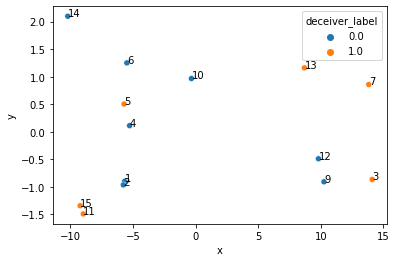

In [12]:
fig = sns.scatterplot(x='x', y='y', hue='deceiver_label', data=pca_df)
for i, label in enumerate (pca_df['user_id']):
    plt.annotate(label, (pca_df['x'][i], pca_df['y'][i]))
plt.show()